In [1]:
#%matplotlib widget
%matplotlib inline

In [2]:
from importlib import reload
import math
import numpy as np
from scipy import stats

from rayoptics.environment import *

In [3]:
import opticalglass.glassfactory as gfact
import opticalglass.glassmap as glassmap
import opticalglass.buchdahl as buchdahl
import opticalglass.schott as schott
import opticalglass.glass as glass
import opticalglass.modelglass as mg
import opticalglass.util as util

# Calculate a model from glass catalog data

In [4]:
def calc_glass_constants(g):
    nd = g.rindex('d')
    nF = g.rindex('F')
    nC = g.rindex('C')
    dFC = nF-nC
    vd = (nd - 1.0)/dFC
    PCd = (nd-nC)/dFC
    return vd, PCd

In [5]:
glasses = glassmap.GlassMapDB()

In [6]:
v1 = None
v2 = None
for i, display in enumerate(glasses.catalogs):
    n, v, p, c0, c1, lbl = glasses.get_data_at(i)
    dsLabel = glasses.get_data_set_label_at(i)
    if v1 is None:
        v1 = np.array(c0)
    else:
        np.append(c0, v1)
    if v2 is None:
        v2 = np.array(c1)
    else:
        np.append(c1, v2)

In [7]:
glasses.catalogs

[(<opticalglass.cdgm.CDGMCatalog at 0x7f81196d5a90>, 'CDGM'),
 (<opticalglass.hikari.HikariCatalog at 0x7f81196d5af0>, 'Hikari'),
 (<opticalglass.hoya.HoyaCatalog at 0x7f81197072b0>, 'Hoya'),
 (<opticalglass.ohara.OharaCatalog at 0x7f8129eebdc0>, 'Ohara'),
 (<opticalglass.schott.SchottCatalog at 0x7f81196e5c40>, 'Schott'),
 (<opticalglass.sumita.SumitaCatalog at 0x7f813942bfa0>, 'Sumita')]

In [8]:
m_all, b_all, r_value, p_value, std_err = stats.linregress(v2, v1)

In [9]:
print("slope: %f    intercept: %f" % (m_all, b_all))
print("R-squared: %f" % r_value**2)

slope: -1.604048    intercept: -0.064667
R-squared: 0.908433


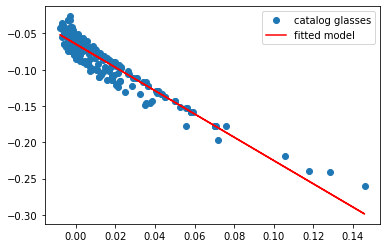

In [10]:
plt.plot(v2, v1, 'o', label='catalog glasses')
plt.plot(v2, b_all + m_all*v2, 'r', label='fitted model')
plt.legend()
plt.show()

In [11]:
schott_cat = schott.SchottCatalog()

In [12]:
schott_data = schott_cat.glass_map_data()

In [13]:
m_schott, b_schott, r_value, p_value, std_err = stats.linregress(schott_data[4], schott_data[3])

In [14]:
print("slope: %f    intercept: %f" % (m_schott, b_schott))
print("R-squared: %f" % r_value**2)

slope: -1.657933    intercept: -0.063092
R-squared: 0.927044


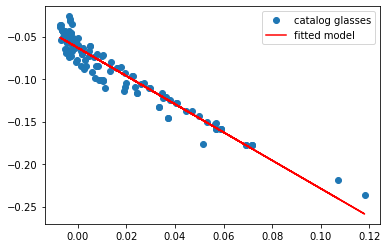

In [15]:
plt.plot(schott_data[4], schott_data[3], 'o', label='catalog glasses')
plt.plot(schott_data[4], b_schott + m_schott*schott_data[4], 'r', label='fitted model')
plt.legend()
plt.show()

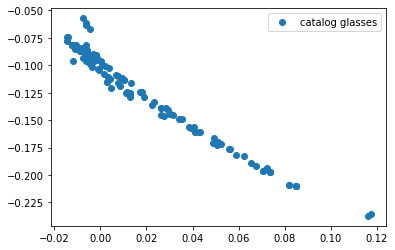

In [16]:
plt.plot(schott_data[4]/(schott_data[0]-1), schott_data[3]/(schott_data[0]-1), 'o', label='catalog glasses')
#plt.plot(schott_data[4]/(schott_data[0]-1), (b_schott + m_schott*schott_data[4])/(schott_data[0]-1), 'r', label='fitted model')
plt.legend()
plt.show()

In [17]:
bk7 = create_glass('N-BK7', 'Schott')
bk7_nd = bk7.rindex('d')
bk7_vd, bk7_PCd = calc_glass_constants(bk7)
print(bk7_nd, bk7_vd, bk7_PCd)

1.5168000345005885 64.1673362374998 0.30763657034898056


In [18]:
bk7.glass_code()

'517.642'

In [19]:
sf6 = create_glass('N-SF6', 'Schott')
sf6_nd = sf6.rindex('d')
sf6_vd, sf6_PCd = calc_glass_constants(sf6)
print(sf6_nd, sf6_vd, sf6_PCd)

1.8051801846158335 25.35972929463037 0.2866528089447528


In [20]:
model_bk7_sf6 = mg.model_from_glasses(bk7, sf6)

In [21]:
model_bk7_sf6

(-0.053099551406849715, -1.7912280320568652)

In [22]:
bk7_mod1 = buchdahl.Buchdahl1(bk7)
bk7_mod2a = buchdahl.Buchdahl2(bk7_nd, bk7_vd)
bk7_mod2b = buchdahl.Buchdahl2(bk7_nd, bk7_vd, model=(b_schott, m_schott))
bk7_mod2c = buchdahl.Buchdahl2(bk7_nd, bk7_vd, model=(model_bk7_sf6))

In [23]:
bk7_mod1.rindex('F')-bk7.rindex('F'), bk7_mod1.rindex('F')-bk7.rindex('F')

(0.0, 0.0)

In [24]:
bk7_mod2a.rindex('F')-bk7.rindex('F'), bk7_mod2b.rindex('F')-bk7.rindex('F'), bk7_mod2c.rindex('F')-bk7.rindex('F')

(-0.00039141222897809413, -0.00034751599139237754, -0.0001477588579208433)

In [25]:
sf6_mod1 = buchdahl.Buchdahl1(sf6)
sf6_mod2a = buchdahl.Buchdahl2(sf6_nd, sf6_vd)
sf6_mod2b = buchdahl.Buchdahl2(sf6_nd, sf6_vd, model=(b_schott, m_schott))
sf6_mod2c = buchdahl.Buchdahl2(sf6_nd, sf6_vd, model=(model_bk7_sf6))

In [26]:
sf6_mod1.rindex('F')-sf6.rindex('F'), sf6_mod1.rindex('F')-sf6.rindex('F')

(0.0, 0.0)

In [27]:
sf6_mod2a.rindex('F')-sf6.rindex('F'), sf6_mod2b.rindex('F')-sf6.rindex('F'), sf6_mod2c.rindex('F')-sf6.rindex('F')

(0.001399859888066679, 0.0013649825463475374, 0.0013911601092750914)

In [28]:
m_sf6_bk7 = (bk7_mod1.coefs[0] - sf6_mod1.coefs[0])/(bk7_mod1.coefs[1] - sf6_mod1.coefs[1])

In [29]:
b_sf6_bk7 = bk7_mod1.coefs[1] - m_sf6_bk7*bk7_mod1.coefs[0]

In [30]:
b_sf6_bk7, m_sf6_bk7

(-0.081288692918037, -1.7912280320568652)

In [31]:
sf6_mod2d = buchdahl.Buchdahl2(sf6_nd, sf6_vd, model=(b_sf6_bk7, m_sf6_bk7))

In [32]:
sf6_mod2d.rindex('F')-sf6.rindex('F')

0.000914834086308991

In [33]:
sf6_mod1.coefs

array([-0.15866786,  0.05893628])

In [34]:
sf6_mod2c.coefs

array([-0.16818367,  0.06424872])

In [35]:
bk7_index = np.array([bk7.rindex(wvl) for wvl in range(450, 700, 5)])

In [36]:
bk7_mod1_index = np.array([bk7_mod1.rindex(wvl) for wvl in range(450, 700, 5)])

In [37]:
bk7_mod2a_index = np.array([bk7_mod2a.rindex(wvl) for wvl in range(450, 700, 5)])
bk7_mod2b_index = np.array([bk7_mod2b.rindex(wvl) for wvl in range(450, 700, 5)])
bk7_mod2c_index = np.array([bk7_mod2c.rindex(wvl) for wvl in range(450, 700, 5)])

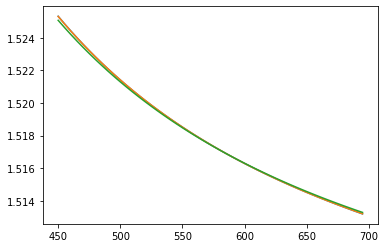

In [38]:
wl = np.arange(450, 700, 5)
plt.plot(wl, bk7_index, wl, bk7_mod1_index, wl, bk7_mod2c_index)
plt.show()

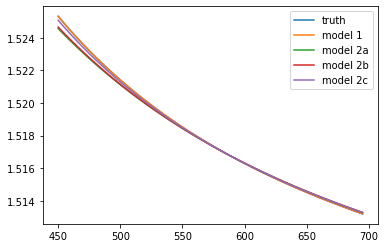

In [39]:
plt.plot(wl, bk7_index, label='truth')
plt.plot(wl, bk7_mod1_index, label='model 1')
plt.plot(wl, bk7_mod2a_index, label='model 2a')
plt.plot(wl, bk7_mod2b_index, label='model 2b')
plt.plot(wl, bk7_mod2c_index, label='model 2c')
plt.legend()
plt.show()

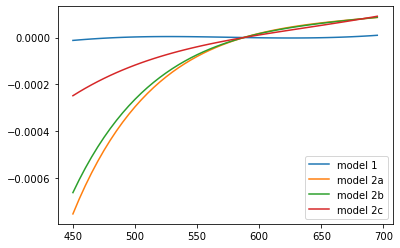

In [40]:
plt.plot(wl, bk7_mod1_index-bk7_index, label='model 1')
plt.plot(wl, bk7_mod2a_index-bk7_index, label='model 2a')
plt.plot(wl, bk7_mod2b_index-bk7_index, label='model 2b')
plt.plot(wl, bk7_mod2c_index-bk7_index, label='model 2c')
plt.legend()
plt.show()

In [41]:
bk7_mod1.coefs

array([-0.04188686, -0.00625978])

In [42]:
bk7_mod2c.coefs

array([-0.04087616, -0.00682403])

In [43]:
wlns=['d', 'h', 'g', 'F', 'e', 'C', 'r']
bk7_indices = [bk7.rindex(w) for w in wlns]

In [44]:
nd, coefs = buchdahl.fit_buchdahl_coords(bk7_indices, wlns=wlns)
bk7_fit_coefs = coefs
bk7_fit_coefs

array([-0.04193814, -0.00613128])

In [45]:
bk7_fit = buchdahl.Buchdahl(buchdahl.get_wv(wlns[0]), bk7_indices[0], bk7_fit_coefs)

In [46]:
bk7_fit_index_wide = np.array([bk7_fit.rindex(wvl) for wvl in range(400, 700, 5)])
bk7_index_wide = np.array([bk7.rindex(wvl) for wvl in range(400, 700, 5)])
bk7_mod1_index_wide = np.array([bk7_mod1.rindex(wvl) for wvl in range(400, 700, 5)])
wl_wide = np.arange(400, 700, 5)

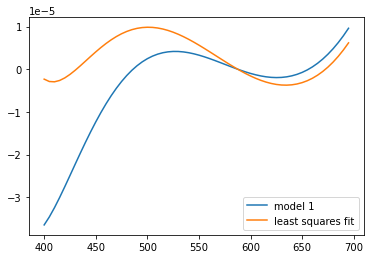

In [47]:
plt.plot(wl_wide, bk7_mod1_index_wide-bk7_index_wide, label='model 1')
plt.plot(wl_wide, bk7_fit_index_wide-bk7_index_wide, label='least squares fit')
plt.legend()
plt.show()

In [48]:
calc_glass_constants(bk7_mod2a)

(68.03559471401019, 0.31742675393254344)

In [49]:
calc_glass_constants(bk7_mod2b)

(67.63004545367707, 0.31575106654653745)

In [50]:
calc_glass_constants(bk7_mod1)

(64.1673362374998, 0.30763657034898056)

In [51]:
r_value, p_value, std_err

(-0.9628312984980117, 1.2330322894690326e-70, 0.042281888437910295)

In [52]:
r, p = stats.pearsonr(schott_data[4], schott_data[3])

In [53]:
r,p

(-0.962831298498012, 1.2330322894685598e-70)

In [54]:
r_value, p_value

(-0.9628312984980117, 1.2330322894690326e-70)

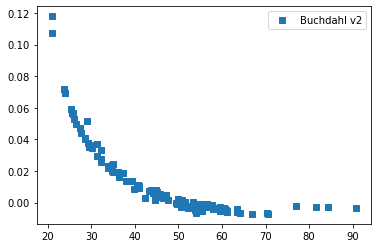

In [55]:
#plt.plot(schott_data[1], schott_data[3], 'o', label='Buchdahl v1')
plt.plot(schott_data[1], schott_data[4], 's', label='Buchdahl v2')
#plt.plot(schott_data[1], model_bk7_sf6[0] + model_bk7_sf6[1]*schott_data[4], 'r', label='fitted model')
#plt.axes.invert_xaxis()
plt.legend()
plt.show()

In [56]:
schott_data[4][0]

0.01626635430120273

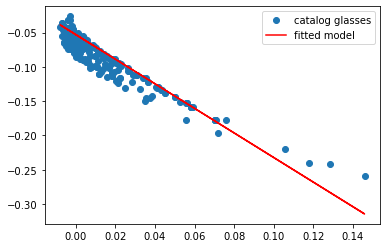

In [57]:
plt.plot(v2, v1, 'o', label='catalog glasses')
plt.plot(v2, model_bk7_sf6[0] + model_bk7_sf6[1]*v2, 'r', label='fitted model')
#plt.plot(schott_data[4], schott_data[3], 'o', label='catalog glasses')
#plt.plot(schott_data[4], model_bk7_sf6[0] + model_bk7_sf6[1]*schott_data[4], 'r', label='fitted model')
plt.legend()
plt.show()

In [58]:
vars(sf6_mod2b)

{'b': -0.06309227969936954,
 'm': -1.6579333920474613,
 'om': (-0.13588611616202362,
  0.05863804688051722,
  -0.19452416304254083,
  0.015026616023637243),
 'wv0': 0.5875617999999999,
 'rind0': 1.8051801846158335,
 'coefs': array([-0.16811385,  0.06334486]),
 'label': '',
 '_catalog_name': ''}

In [59]:
vars(sf6_mod1)

{'om': (-0.13588611616202362, 0.05863804688051722),
 'wv0': 0.5875617999999999,
 'rind0': 1.8051801846158335,
 'coefs': array([-0.15866786,  0.05893628]),
 'label': '',
 '_catalog_name': ''}

In [60]:
vars(bk7_mod1)

{'om': (-0.13588611616202362, 0.05863804688051722),
 'wv0': 0.5875617999999999,
 'rind0': 1.5168000345005885,
 'coefs': array([-0.04188686, -0.00625978]),
 'label': '',
 '_catalog_name': ''}

In [61]:
vars(sf6_mod2c)

{'b': -0.053099551406849715,
 'm': -1.7912280320568652,
 'om': (-0.13588611616202362,
  0.05863804688051722,
  -0.19452416304254083,
  0.015026616023637243),
 'wv0': 0.5875617999999999,
 'rind0': 1.8051801846158335,
 'coefs': array([-0.16818367,  0.06424872]),
 'label': '',
 '_catalog_name': ''}

In [62]:
model_bk7_sf6

(-0.053099551406849715, -1.7912280320568652)

In [63]:
mg.model_from_glasses(bk7, sf6)

(-0.053099551406849715, -1.7912280320568652)

In [64]:
util.calc_glass_constants(sf6_mod2d.rindex('d'), sf6_mod2d.rindex('F'), sf6_mod2d.rindex('C'))

(24.261948571061488, 0.7100336466279819)

In [65]:
sf6_mod2d.rindex('d')

1.8051801846158335